# Implementing the K-Means algorithm from Scratch

### Steps:
**1. Random Initialization:** The best practice for centroid assignment is to randomly initialize it and do multiple iterations till we find the best results. But for this code, I selected the first two datapoints as the centroids.

**2. Cluster Assignment:** *(Outer loop)* In this step we will all the datapoints to which centroid is close to, using Euclidean distance. And storing the all the nearest points in a dictionary, where the keys will be the cluster number.

**3. Moving the centroids:** *(Inner loop)* In this step we will move the centroid based on the average of all the points associated to individual clusters, and repeating this step until there is no further movement.

In [0]:
#Importing the dependencies
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

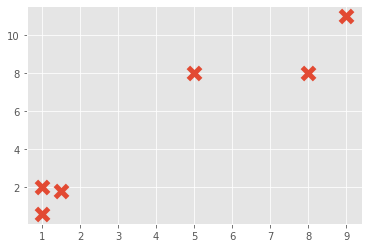

In [69]:
#Training Data
X = np.array([[1,2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
             [9, 11]])
plt.scatter(X[:, 0], X[:, 1], s = 150, marker='x', linewidth = 5)

In [0]:
#Color code for clusters
colors = ['g', 'r']

# Defining K-Means function
class K_Means:
  def __init__(self, k=2, tol = 0.001, max_iter = 300):  
    '''tol(Tolerance): the degree by which the centroid will move that will be
       by percent change.
       max_iter: No. of times the algorithm runs'''
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self, data):

    # Storing the final values of centroids, values of the dictionary will be 
    # coordinates of the centroids
    self.centroids = {}

    for i in range(self.k):
      # The first two centroids will be the first two data points
      # (Random Initialization)
      self.centroids[i] = data[i]

    # Optimization
    for i in range(self.max_iter):
      # Keys: Centroids(0 or 1) and values: feature sets associated with the cluster
      # (Cluster Assignment)
      self.classifications = {}

      for i in range(self.k):
        self.classifications[i] = []

      for featureset in data:
        # Calculating distances of datapoints from each centroid and storing in a list
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      # Storing initial centroids to compute the tolerance
      prev_centroids = dict(self.centroids)

      for classification in self.classifications:
        # Average of all the classifications/features for a given class and
        # redefining the new centroid (Moving the centroid)
        self.centroids[classification] = np.average(self.classifications[classification], axis = 0)

      # Optimization flag
      optimized = True

      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        # To check the movement of the centroid is within the tolerance
        if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
          optimized = False

      # If it satisfies the above conditions the optimization loop will break
      if optimized:
        break
  
  # Defining the predict function
  def predict(self, data):
    distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification

In [0]:
# Training the model
clf = K_Means()
clf.fit(X)

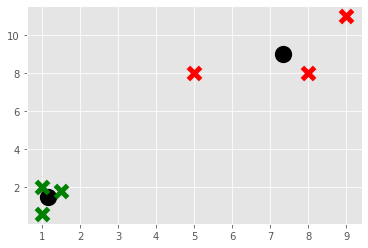

In [80]:
# Visulaizing the results
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
              marker = 'o', color = 'k', s = 150, linewidth = 5)
  
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker = 'x', color = color,
                s = 150, linewidth = 5)
    
plt.show()

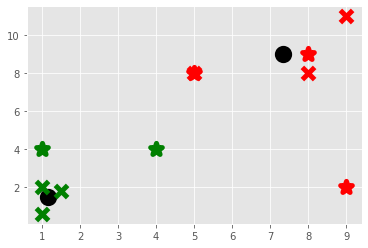

In [84]:
# Visualizing the results for unknown datapoints
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
              marker = 'o', color = 'k', s = 150, linewidth = 5)
  
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker = 'x', color = color,
                s = 150, linewidth = 5)
    
# Adding the test data for predictions
unknowns = np.array([[5, 8],
                    [8, 9],
                    [1, 4],
                    [4, 4],
                    [9, 2],])

for unknown in unknowns:
  classification = clf.predict(unknown)
  plt.scatter(unknown[0], unknown[1], marker = '*', color = colors[classification],
              s = 150, linewidth = 5)
  
plt.show()